<a href="https://colab.research.google.com/github/andressa-uchoas/pretalab/blob/main/andressa_uchoas_atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto 3: Bibliotecas Python para Análise de Dados

Objetivo: Entender como está o comportamento dos millenials brasileiros, também conhecida como geração Y, quando o cenário é educação.

Executar

1. Carregar os arquivos 'PNAD24_EDUCACAO.csv', 'dicionario_colunas' com pandas
2. Filtrar os dados para idade entre 18 e 35 anos - faixa etaria da geração Y
3. tratar os valores das colunas conforme o dicionario de dados:

    sexo,
    idade,
    raça,
    sabe_ler_escrever

4. transformar a coluna idade em faixa etaria conforme o intervalo: 18-23, 24-29 e 30-35.
5. Faça uma contagem na coluna e mostre o resultado como um gráfico de barras do matplotlib com o volume de pessoas que sabem ler e escrever
6. Agrupe a coluna sexo,raca, faixa_etaria,sigla_uf e sabe_ler_escrever fazendo a contagem desse agrupamento, salve em um dataframe o resultado. Responda  qual a distribuição Brasil da geração Y pesquisada;
7. Filtre o dataframe do ponto 2 para apenas os que lê e escreve, salve o resultado em novo dataframe.
8. Faça um gráfico de barras horizontais para cada gênero filtrado pela raça de cada gênero, em que o eixo y é a sigla dos estados e o eixo x  o volume. Identifique como é o comportamento de homens brancos e mulheres negras no  Brasil da geração Y pesquisada na faixa etária 18-23 que lê e escreve?

 #dica: para filtrar o dataframe e fazer gráfico vc pode usar o método:

 df[((df_novo['coluna1'] == valor_filtro) & (df['coluna2'] == valor_filtro) & (df['coluna'] == valor_filtro))].plot(kind='barh', x='coluna1', y='contagem')


9. Escreva uma conclusão do insights que encontrou no ponto 4 (OPCIONAL)

In [33]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Importar o dataframe

df_pnad = pd.read_csv('/content/pnad24_educacao.csv', delimiter=',',header=0, )
df_colunas = pd.read_csv('/content/dicionario_colunas.csv', delimiter=',',header=0, )
df_dados = pd.read_csv('/content/dicionario_dados.csv', delimiter=',',header=0, )

In [35]:
df_pnad.head()

,ano,trimestre,sigla_uf,sigla_uf_nome,id_pessoa,V2007,V2009,V2010,V3001,V3002,...,V3009,V3009A,V3010,V3011,V3011A,V3012,V3013,V3013A,V3013B,V3014
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
4,2024,2,AP,Amapá,160000321031102,Mulher,78,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Renomear as colunas do df_pnad usando o dicionário de mapeamento
mapping = df_colunas.set_index('nome_coluna_codigo')['coluna__perguntas_abrev'].to_dict()
for code, name in df_colunas.set_index('nome_coluna_codigo')['coluna_pergunta'].items():
    if pd.isna(mapping.get(code)):
        mapping[code] = name

df_pnad.rename(columns=mapping, inplace=True)

In [37]:
df_pnad.head()

,ano,trimestre,sigla_uf,sigla_uf_nome,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
4,2024,2,AP,Amapá,160000321031102,Mulher,78,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Filtrar os dados para idade entre 18 e 35 anos - faixa etaria da geração Y

geracao_y_df = df_pnad[(df_pnad['idade'] >= 18) & (df_pnad['idade'] <= 35)]
geracao_y_df.head()

,ano,trimestre,sigla_uf,sigla_uf_nome,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
5,2024,2,AP,Amapá,160000321031103,Homem,23,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0


In [39]:
#Transformar a coluna 'idade' em faixas etárias
geracao_y_df.loc[:, 'faixa_etaria'] = pd.cut(geracao_y_df['idade'], bins=[17, 23, 29, 35], labels=faixa_etaria_labels)
# Verificar a nova coluna
geracao_y_df[['idade', 'faixa_etaria']].head()

<ipython-input-39-6762139fa4a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geracao_y_df.loc[:, 'faixa_etaria'] = pd.cut(geracao_y_df['idade'], bins=[17, 23, 29, 35], labels=faixa_etaria_labels)


,idade,faixa_etaria
0,27,24-29
1,33,30-35
2,27,24-29
3,27,24-29
5,23,18-23


In [40]:
#Volume de pessoas que sabem ler e escrever
count_read_write = geracao_y_df['sabe_ler_escrever'].value_counts()

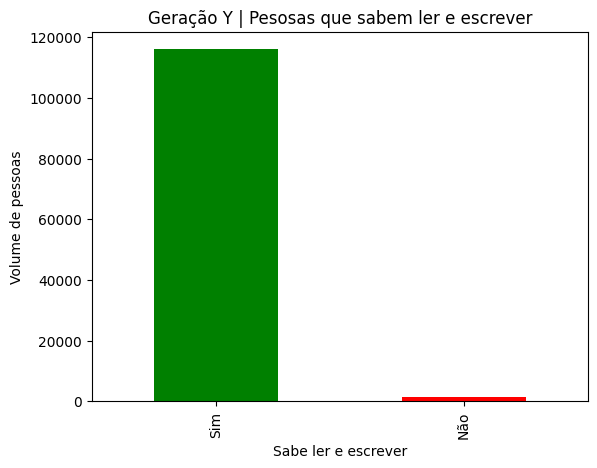

In [48]:
#Plotagem do gráfico de barras
count_read_write.plot(kind='bar', color=['green', 'red'])
plt.title('Geração Y | Pesosas que sabem ler e escrever')
plt.xlabel('Sabe ler e escrever')
plt.ylabel('Volume de pessoas')
plt.xticks([0, 1], ['Sim', 'Não'])

plt.show()

In [51]:
#Agrupar por sexo, raça, faixa_etaria, sigla_uf e sabe_ler_escrever e contar os valores
grupo_df = geracao_y_df.groupby(['sexo', 'raca', 'faixa_etaria', 'sigla_uf', 'sabe_ler_escrever'], observed=True).size().reset_index(name='contagem')
grupo_df.head()

,sexo,raca,faixa_etaria,sigla_uf,sabe_ler_escrever,contagem
0,Homem,1,18-23,AC,1,91
1,Homem,1,18-23,AL,1,233
2,Homem,1,18-23,AL,2,4
3,Homem,1,18-23,AM,1,115
4,Homem,1,18-23,AM,2,1


In [57]:
#Filtrar o DataFrame da geração y para apenas os que lêem e escrevem
ler_escrever_df = geracao_y_df[geracao_y_df['sabe_ler_escrever'] == 1]
ler_escrever_df.head()

,ano,trimestre,sigla_uf,sigla_uf_nome,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente,faixa_etaria
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,24-29
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,30-35
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0,24-29
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,24-29
5,2024,2,AP,Amapá,160000321031103,Homem,23,4,1,2,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,18-23


In [71]:
print(ler_escrever_df['raca'].value_counts())
print(ler_escrever_df['sexo'].value_counts())
print(ler_escrever_df['faixa_etaria'].value_counts())

raca
4    60651
1    41761
2    12374
5      737
3      536
9        6
Name: count, dtype: int64
sexo
Mulher    59244
Homem     56821
Name: count, dtype: int64
faixa_etaria
24-29    38946
18-23    38687
30-35    38432
Name: count, dtype: int64


sexo
Mulher    59244
Homem     56821
Name: count, dtype: int64
raca
4    60651
1    41761
2    12374
5      737
3      536
9        6
Name: count, dtype: int64


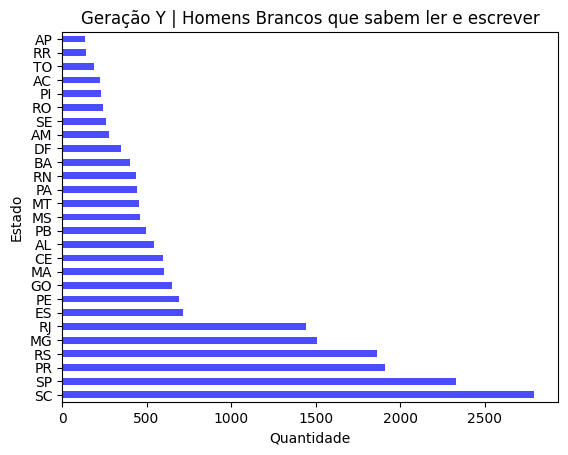

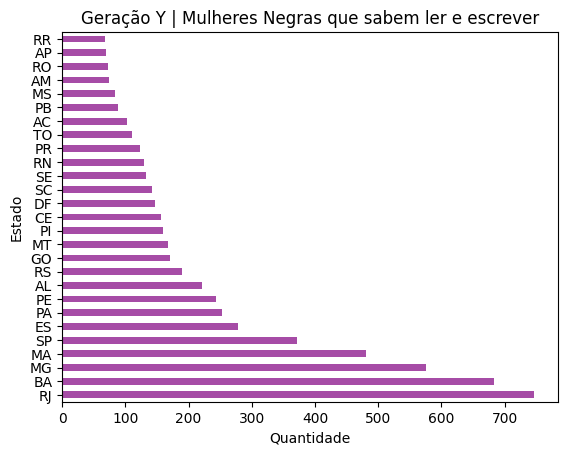

In [75]:
#Plotar gráfico de barras horizontais para cada gênero filtrado pela raça de cada gênero

# Verifique as contagens de valores únicos na coluna de sexo e raça
print(ler_escrever_df['sexo'].value_counts())  # Para ver os gêneros disponíveis
print(ler_escrever_df['raca'].value_counts())  # Para ver as raças disponíveis

# Filtrar para homens brancos (sexo = 'Homem' e raça = 1) e mulheres negras (sexo = 'Mulher' e raça = 2)
homens_brancos_df = ler_escrever_df[(ler_escrever_df['sexo'] == 'Homem') & (ler_escrever_df['raca'] == 1)]
mulheres_negras_df = ler_escrever_df[(ler_escrever_df['sexo'] == 'Mulher') & (ler_escrever_df['raca'] == 2)]

# Contar o número de pessoas por estado (sigla_uf)
homens_brancos_contagem = homens_brancos_df['sigla_uf'].value_counts()
mulheres_negras_contagem = mulheres_negras_df['sigla_uf'].value_counts()

# Gráfico de barras horizontais para homens brancos
homens_brancos_contagem.plot(kind='barh', color='blue', alpha=0.7)
plt.title('Geração Y | Homens Brancos que sabem ler e escrever')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.show()

# Gráfico de barras horizontais para mulheres negras
mulheres_negras_contagem.plot(kind='barh', color='purple', alpha=0.7)
plt.title('Geração Y | Mulheres Negras que sabem ler e escrever')
plt.xlabel('Quantidade')
plt.ylabel('Estado')
plt.show()

É evidente uma grande variação na quantidade de homens brancos alfabetizados entre os diferentes Estados brasileiros em comparação ao volume de mulheres negras na mesma faixa etária. Alguns Estados concentram um número significativamente maior de indivíduos alfabetizados em relação a outros apresentando maiores taxas de alfabetização em algumas regiões do país, como o Sudeste.